<a href="https://colab.research.google.com/github/SeeeRGo/ml-experiments/blob/main/RussianPostHackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import training data set

In [2]:
import torch
import pandas as pd
from google.colab import auth
from googleapiclient.discovery import build

import io
from googleapiclient.http import MediaIoBaseDownload

In [3]:
auth.authenticate_user()
drive_service = build('drive', 'v3')


In [4]:
request = drive_service.files().get_media(fileId='1Cu_Su0BpJeLzInuF2M5wnsy9Pu9hxXi8')
downloaded = io.BytesIO()
downloader = MediaIoBaseDownload(downloaded, request)
done = False
while done is False:
  # _ is a placeholder for a progress object that we ignore.
  # (Our file is small, so we skip reporting progress.)
  _, done = downloader.next_chunk()

downloaded.seek(0)
print('Downloaded file contents are: {}')
train_dataframe = pd.read_csv(downloaded)
train_dataframe.head()

Downloaded file contents are: {}


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,oper_type + oper_attr,index_oper,type,priority,is_privatecategory,class,is_in_yandex,is_return,weight,...,dist_qty_oper_login_1,total_qty_oper_login_1,total_qty_oper_login_0,total_qty_over_index_and_type,total_qty_over_index,is_wrong_sndr_name,is_wrong_rcpn_name,is_wrong_phone_number,is_wrong_address,label
0,6818780,1043_-1,628629.0,Участок,7503.0,N,0.0,Y,N,87.0,...,42.0,720176.0,58950.0,779126.0,8290896.0,0,0,0,0,0
1,9907176,1023_-1,102976.0,ММПО,7503.0,N,0.0,N,N,107.0,...,914.0,48856658.0,83318932.0,132175590.0,136819803.0,0,0,0,0,0
2,3304275,1018_-1,620962.0,Цех,7503.0,N,0.0,Y,N,50.0,...,62.0,3246292.0,3233068.0,6479360.0,52708071.0,0,1,0,0,0
3,9020937,1019_-1,344964.0,Цех,7503.0,N,0.0,Y,N,416.0,...,55.0,2060928.0,653280.0,2714208.0,19562334.0,0,0,0,0,0
4,3082311,1020_-1,629819.0,Участок,7503.0,N,0.0,Y,N,795.0,...,16.0,316919.0,27911.0,344830.0,4719186.0,0,0,0,0,0


In [5]:
train_dataframe.columns

Index(['id', 'oper_type + oper_attr', 'index_oper', 'type', 'priority',
       'is_privatecategory', 'class', 'is_in_yandex', 'is_return', 'weight',
       'mailtype', 'mailctg', 'mailrank', 'directctg', 'transport_pay',
       'postmark', 'name_mfi', 'weight_mfi', 'price_mfi',
       'dist_qty_oper_login_1', 'total_qty_oper_login_1',
       'total_qty_oper_login_0', 'total_qty_over_index_and_type',
       'total_qty_over_index', 'is_wrong_sndr_name', 'is_wrong_rcpn_name',
       'is_wrong_phone_number', 'is_wrong_address', 'label'],
      dtype='object')

In [6]:
only_numbers = train_dataframe[["weight", "transport_pay", "label"]]
only_numbers.head()

,weight,transport_pay,label
0,87.0,0.00,0
1,107.0,0.00,0
2,50.0,0.00,0
3,416.0,35.34,0
4,795.0,52.52,0


### Make a split on training, validation and test data

I think 70/15/15 would be good enough

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(only_numbers[["weight", "transport_pay"]], only_numbers[["label"]],
    test_size=0.2, shuffle = True, random_state = 8)

# Use the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2


print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(X_val.shape))
print("y val shape: {}".format(y_val.shape))

X_train shape: (3600000, 2)
X_test shape: (1200000, 2)
y_train shape: (3600000, 1)
y_test shape: (1200000, 1)
X_val shape: (1200000, 2)
y val shape: (1200000, 1)


Coefficients: 
 [[-3.01411588e-06 -3.78742049e-04]]
Mean squared error: 0.03
Coefficient of determination: 0.00


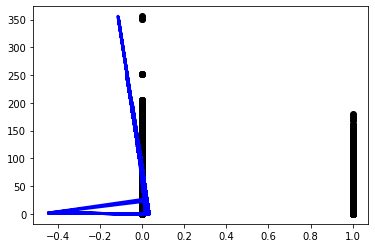

In [25]:
from sklearn import linear_model
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_val)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_val, y_pred))

# Plot outputs
plt.scatter(y_val, X_val[["transport_pay"]], color="black")
plt.plot(y_pred, X_val[["transport_pay"]], color="blue", linewidth=3)

# plt.xticks(())
# plt.yticks(())

plt.show()

### Plot raw data

### Plot resulting metrics